In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.ensemble import RandomForestClassifier

# Datasets


In the first cell, we provide four toy datasets for classification, featuring both linear and non-linear decision frontiers. Using decision trees, random forests, and AdaBoost, we will develop and analyze classifiers capable of handling non-linear decision boundaries.


We also provide in the second cell auxiliary code for plotting the decision boundaries of the trees, called `plot_tree`. 


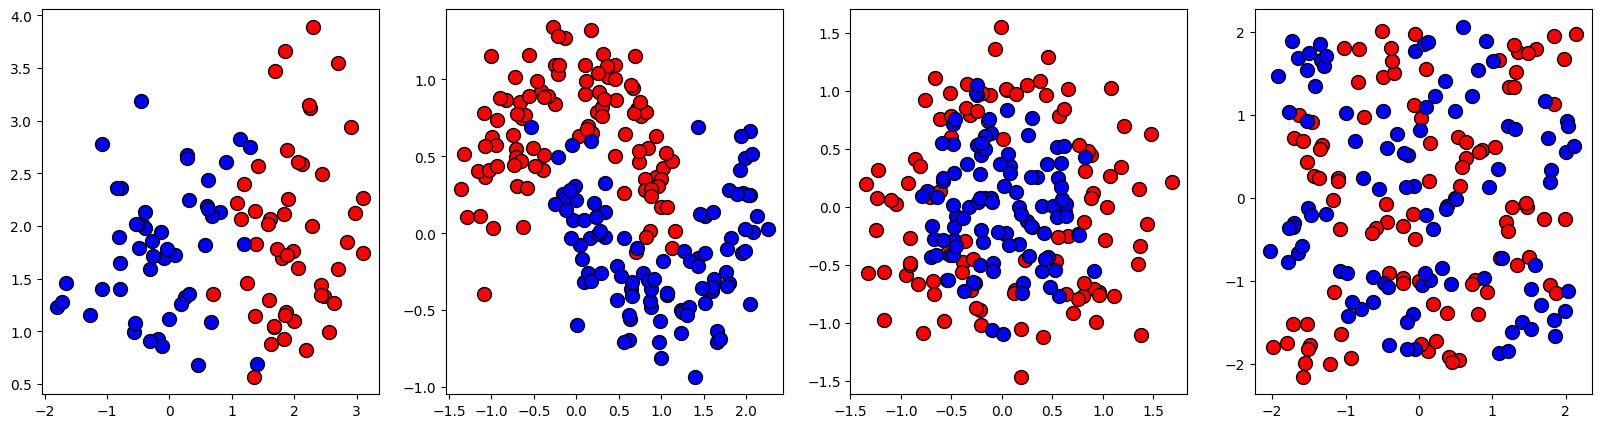

In [2]:
def rand_checkers(n1=100, n2=100, sigma=0.1):
    """ Sample n1 and n2 points from a noisy checker"""
    nbp = int(np.floor(n1 / 8))
    nbn = int(np.floor(n2 / 8))
    xapp = np.reshape(np.random.rand((nbp + nbn) * 16), [(nbp + nbn) * 8, 2])
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if (((i + j) % 2) == 0):
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 2 + 1] * nb
            xapp[idx:(idx + nb), 0] = np.random.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * np.random.randn(nb)
            xapp[idx:(idx + nb), 1] = np.random.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * np.random.randn(nb)
            idx += nb
    ind = np.arange((nbp + nbn) * 8)
    np.random.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])-1

plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1),
            rand_checkers()]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)
dataset = datasets[1]

In [3]:
def plot_tree(clf,X,y):
  n_classes = 2
  plot_colors = "rb"
  plot_step = 0.02
  plt.figure(figsize=(3,3))   
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")
  # Plot the training points
  for i, color in zip([-1,1], plot_colors):
      idx = np.where(y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, alpha=.2)
  plt.show()

# Impurity measures
## Exercises 1, 2, 3

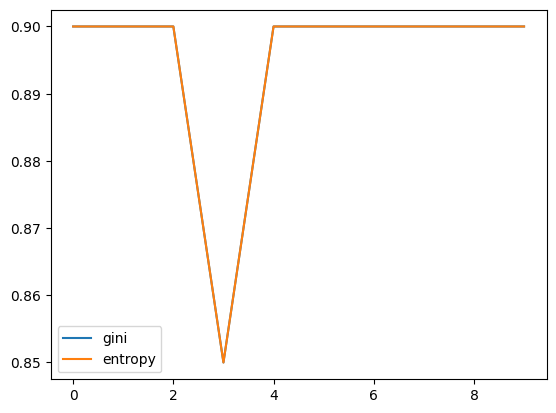

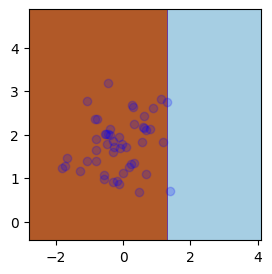

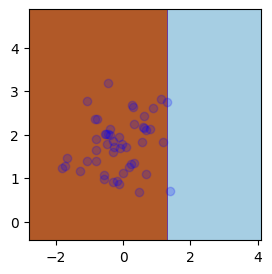

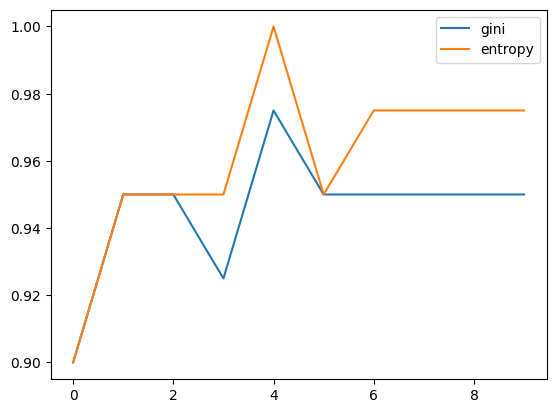

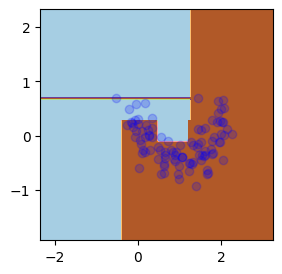

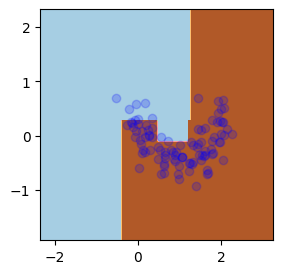

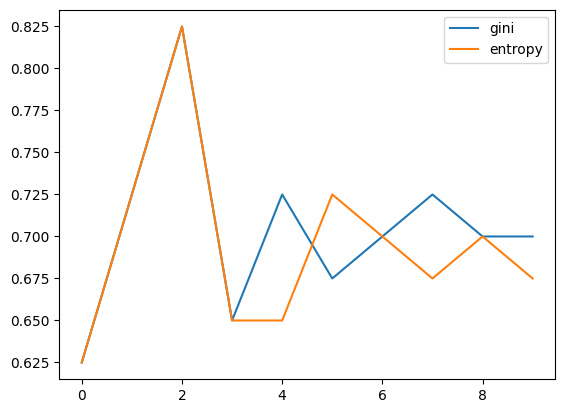

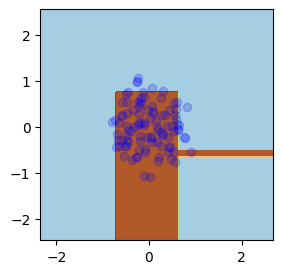

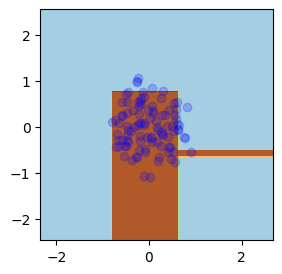

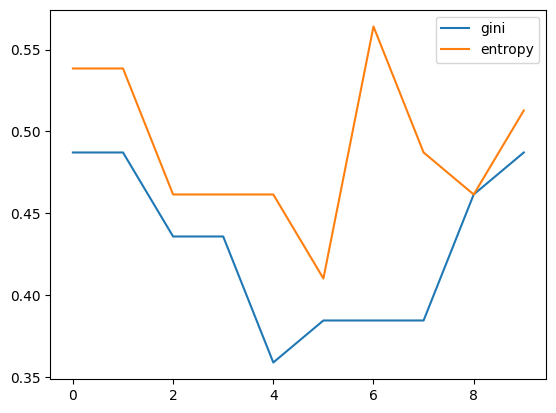

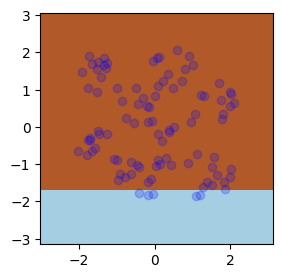

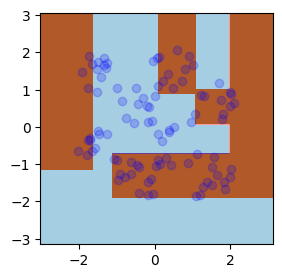

Compairing RF on dataset 2


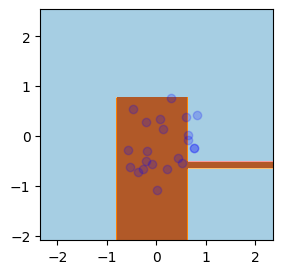

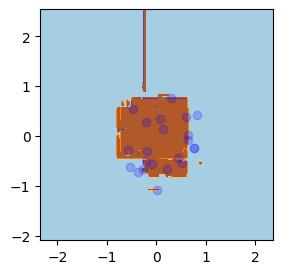

In [32]:

            ######################
            ### Your code here ### 
            ######################

best_dts = []
data = []

for i, dataset in enumerate(datasets):
    x, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    data.append((X_train, X_test, y_train, y_test))

    scores_gini = []
    scores_entropy = []

    best_gini = None
    best_entropy = None

    for max_depth in range(1, 11):
        dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=80)
        dt_gini.fit(X_train, y_train)
        scores_gini.append(dt_gini.score(X_test, y_test))

        if np.argmax(scores_gini) == len(scores_gini) - 1:
            best_gini = dt_gini

        dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=80)
        dt_entropy.fit(X_train, y_train)
        scores_entropy.append(dt_entropy.score(X_test, y_test))

        if np.argmax(scores_entropy) == len(scores_entropy) - 1:
            best_entropy = dt_entropy

    if best_gini.score(X_test, y_test) > best_entropy.score(X_test, y_test):
        best_dts.append(best_gini)
    else:
        best_dts.append(best_entropy)
            
    plt.plot(scores_gini, label="gini")
    plt.plot(scores_entropy, label="entropy")

    plt.legend()
    plt.show()

    plot_tree(best_gini, x, y)
    plot_tree(best_entropy, x, y)

print("Compairing RF on dataset 2")
rf = RandomForestClassifier()
x_train2, x_test2, y_train2, y_test2 = data[2]
rf.fit(x_train2, y_train2)
plot_tree(best_dts[2], x_test2, y_test2)
plot_tree(rf, x_test2, y_test2)

# Ensembles
## Exercise 4, random forest

In [5]:
import numpy as np
from sklearn.datasets import  load_diabetes, load_iris, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.utils import shuffle

# Load datasets
diabetes = load_diabetes()
iris = load_iris()
digits = load_digits()

# Evaluate on Diabetes dataset (Regression)
X_diabetes, y_diabetes = shuffle(diabetes.data, diabetes.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, random_state=42)
rf_diabetes = RandomForestRegressor()
rf_diabetes.fit(X_train, y_train)
scores = cross_val_score(rf_diabetes, X_test, y_test, cv=5, scoring="r2")
print(f"Diabetes: {scores.mean():.3f} ± {scores.std():.3f}")

# Evaluate on Iris dataset (Classification)
X_iris, y_iris = shuffle(iris.data, iris.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=42)
rf_iris = RandomForestClassifier()
rf_iris.fit(X_train, y_train)
scores = cross_val_score(rf_iris, X_test, y_test, cv=5, scoring="accuracy")
print(f"Iris: {scores.mean():.3f} ± {scores.std():.3f}")


# Evaluate on Digits dataset (Classification)
X_digits, y_digits = shuffle(digits.data, digits.target, random_state=0)
            ######################
            ### Your code here ### 
            ######################

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)
rf_digits = RandomForestClassifier()
rf_digits.fit(X_train, y_train)
scores = cross_val_score(rf_digits, X_test, y_test, cv=5, scoring="accuracy")
print(f"Digits: {scores.mean():.3f} ± {scores.std():.3f}")

Diabetes: 0.247 ± 0.151
Iris: 0.925 ± 0.061
Digits: 0.951 ± 0.022


## Exercise 5, feature importance

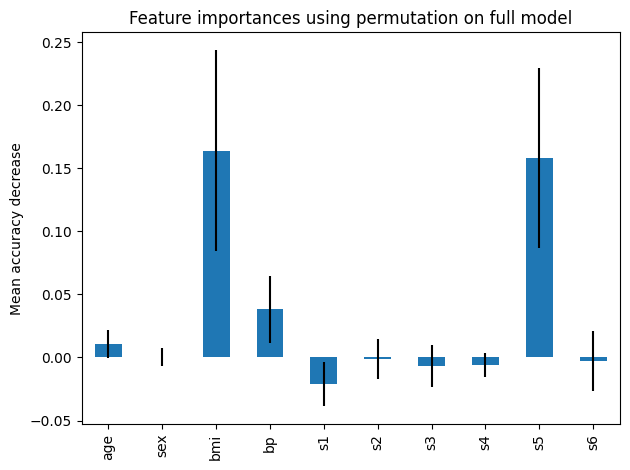

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Regressor
            ######################
            ### Your code here ### 
            ######################
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


# Compute the feature importance and plot the results
            ######################
            ### Your code here ### 
            ######################

# From sklearn documentation (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=diabetes['feature_names'])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

As we can see the most important features are bmi and s5; the other features don't seem to have a significant participation. Restraining the dataset to the two most important features may improve the generalization of the model.

# Regression
## Exercise 6

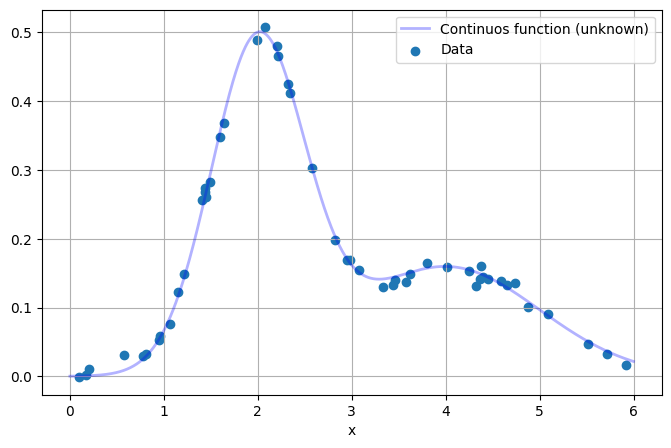

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean_1, std_1 = 2, 0.5  
mean_2, std_2 = 4, 1    
weight_1 = 0.6  
weight_2 = 0.4  
x = np.linspace(0, 6, 1000)
pdf_1 = norm.pdf(x, mean_1, std_1)
pdf_2 = norm.pdf(x, mean_2, std_2)
mixture_pdf = weight_1 * pdf_1 + weight_2 * pdf_2
plt.figure(figsize=(8, 5))
plt.plot(x, mixture_pdf, label="Continuos function (unknown)", alpha=.3, color="blue", lw=2)
plt.xlabel("x")
plt.grid(True)
Xr = np.sort(6 * np.random.rand(50))  
pdf_1 = norm.pdf(Xr, mean_1, std_1)
pdf_2 = norm.pdf(Xr, mean_2, std_2)
yr = weight_1 * pdf_1 + weight_2 * pdf_2
yr += np.random.normal(0,.01,len(yr))
plt.scatter(Xr, yr,label="Data")
plt.legend()
plt.show()

[]

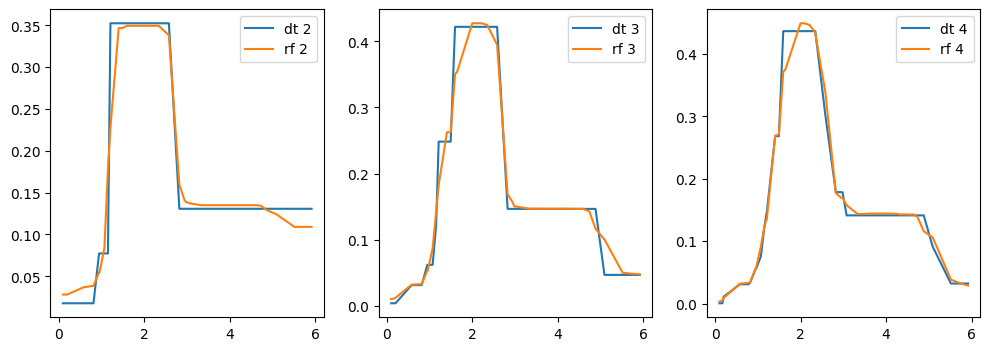

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

            ######################
            ### Your code here ### 
            ######################
x = Xr.reshape(-1,1)

fig, ax = plt.subplots(1,3, figsize=(12,4))

for i, d in enumerate([2,3,4]):
    dt = DecisionTreeRegressor(criterion="squared_error", max_depth=d)
    rf = RandomForestRegressor(criterion="squared_error", max_depth=d)
    
    dt.fit(x, yr)
    rf.fit(x, yr)
    
    y_pred_dt = dt.predict(x)
    y_pred_rf = rf.predict(x)
    
    ax[i].plot(x,y_pred_dt,label=f"dt {d}")
    ax[i].plot(x,y_pred_rf,label=f"rf {d}")
    ax[i].legend()
plt.plot()

We used the MSE impurity criterion for both the decision tree and the random forest. 
We can notice that the curve generated by the random forest is more smooth and continious than the one of decision tree.

# AdaBoost + stump (bonus question)
## Exercise 7 (+13)

In [ ]:
from sklearn import tree

class My_stump:
  
  def __init__(self):
    self.best_dimension = None
    self.best_threshold = None
    self.class_bellow_threshold = None
    self.class_above_threshold = None
    self.best_ev = None
  def get_threshold(self): 
      return self.best_threshold
  def get_best(self): 
      return self.best_dimension,  self.best_threshold, self.best_ev
    
  def fit(self,X,y, sample_weight=None): 
    if sample_weight is None: sample_weight = np.ones(len(X))
    best_ev = None
    region = [X.min(axis=0), X.max(axis=0)]
    for dimension in [0,1]:
      # we evaluate all the possible partitions incrementally
      # at the beggining we assume that all datapoints are in the 'right' partition
      # at the end, they will all in be the 'left' partition
      
      ######################
      ### Your code here ### 
      ######################


  def predict(self,X) :
    res = []
    for x in X[:,self.best_dimension]:
      if x < self.best_threshold :
      ######################
      ### Your code here ### 
      ######################
    return np.array(res)


  
dataset = datasets[1]
X = dataset[0]
y = dataset[1]*2-1 # For AdaBoost y={-1,+1} but the rest can be y={0,1} 

my_stump = My_stump()
my_stump.fit(X, y, w)
plot_tree(my_stump,X,y)

# Sanity check: my_stump should be the same as the decisionTree of depth=1
clf = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
plot_tree(clf,X,y)

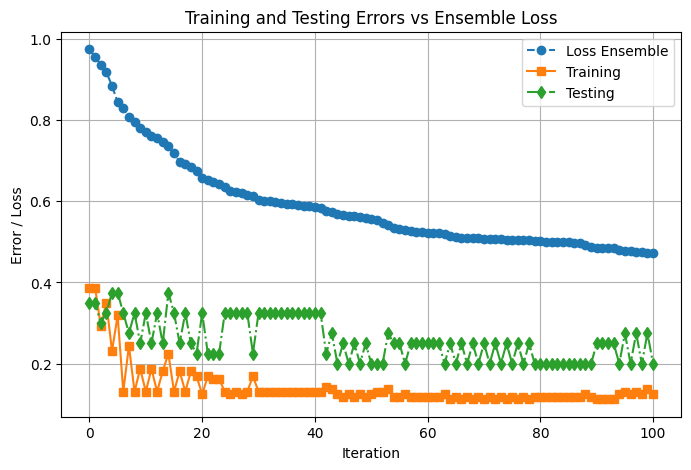

In [46]:
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
def compute_error(y, y_pred, w_m):
    ######################
    ### Your code here ### 
    ######################

    return np.sum(w_m*(y_pred != y))


def compute_alpha(error):
    ######################
    ### Your code here ### 
    ######################

    return np.log((1 - error) / error) / 2

def update_weights(w_i, alpha, y, y_pred, error):
    ######################
    ### Your code here ### 
    ######################

    return w_i * np.exp(- alpha * y * y_pred)
  
class AdaBoost:
    
    def __init__(self):
        self.alphas = [] # list of coefficients for the classifiers
        self.G_M = [] # list of wesk clssifier
        self.M = None # number of iterations
        # we save the error for plotting the evoltion of the performance
        self.training_errors = []
        self.testing_errors = []
        self.loss_ensemble = []
    
    def predict(self, X):
        ######################
        ### Your code here ### 
        ######################

        y_pred = np.zeros(X.shape[0])
        
        for i in range(len(self.alphas)):
            alpha = self.alphas[i]
            G = self.G_M[i]

            y_pred += alpha * G.predict(X)
            
        return np.sign(y_pred)

    def fit(self, X, y, M = 1, X_test=None, y_test=None):
        self.alphas = [] 
        self.training_errors, self.testing_errors = [],[]
        self.M = M
        Z=1

        # Iterate over M weak classifiers
        for m in range(0, M):
            # Set weights for current boosting iteration
            if m == 0:
                w_m = np.ones(len(y)) * 1 / len(y)  
            else:
                w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)

            # Now, we can use our stumps...
            G_m = DecisionTreeClassifier(max_depth = 1) # Stump from sklearn
            G_m.fit(X, y, sample_weight = w_m)
            y_pred = G_m.predict(X)
            # ... or the ones from sklearn
            # G_m_my = My_stump() # Stump coded in the previous (bonus) question
            # G_m_my.fit(X, y, sample_weight = w_m)
            # my_pred = G_m_my.predict(X) 
            
            ######################
            ### Your code here ### 
            ######################

            error_m = compute_error(y, y_pred, w_m)
            alpha_m = compute_alpha(error_m)
            Z *= 2 * np.sqrt(error_m * (1 - error_m))
            
            self.G_M.append(G_m)
            self.alphas.append(alpha_m)

            y_pred_train = self.predict(X)
            y_pred_test = self.predict(X_test)

            score_train = np.sum(y_pred_train != y) / y.shape[0]
            score_test = np.sum(y_pred_test != y_test) / y_test.shape[0]
            
            self.training_errors.append(score_train)
            self.testing_errors.append(score_test)
            self.loss_ensemble.append(Z)

dataset = datasets[2]
X = dataset[0]
y = dataset[1]*2-1 # For the AdaBoost y={-1,+1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ab = AdaBoost()
ab.fit(X_train, y_train, M = 101, X_test=X_test, y_test=y_test)
plt.figure(figsize=(8, 5))
plt.plot(ab.loss_ensemble, label="Loss Ensemble", linestyle="--", marker="o")
plt.plot(ab.training_errors, label="Training", linestyle="-", marker="s")
plt.plot(ab.testing_errors, label="Testing", linestyle="-.", marker="d")
plt.xlabel("Iteration")
plt.ylabel("Error / Loss")
plt.title("Training and Testing Errors vs Ensemble Loss")
plt.legend()
plt.grid(True)
plt.show()

# AUC ROC - AUC PR

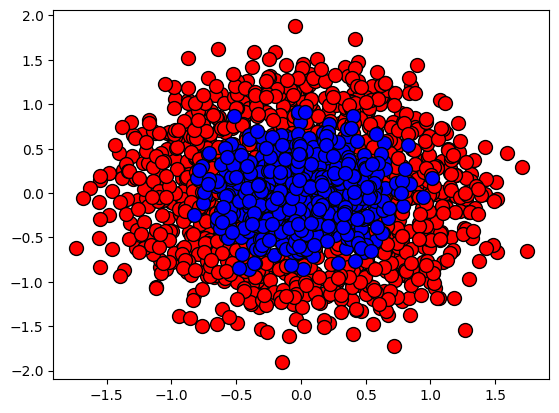

In [28]:
X,y = make_circles(n_samples = 2000, noise=0.3, factor=0.1)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', s=100)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr(proba, y_true):
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_true, proba) ### Your code here ### 
    roc_auc = auc(fpr, tpr) ### Your code here ### 
    
    # Compute Precision-Recall curve and PR AUC
    precision, recall, _ = precision_recall_curve(y_true, proba)  ### Your code here ### 
    pr_auc = average_precision_score(y_true, proba) ### Your code here ### 
    
    # Plot ROC Curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    
    plt.tight_layout()
    plt.show()
    
def subsample_data(X, y, keep_ratio=0.4):
    """Subsample dataset to keep all class 1 and only a fraction of class 0."""
    class_1_mask = y == 0
    class_0_mask = y == 1
    X_class_1 = X[class_1_mask]
    y_class_1 = y[class_1_mask]
    X_class_0 = X[class_0_mask]
    y_class_0 = y[class_0_mask]
    np.random.seed(0)
    sample_indices = np.random.choice(len(X_class_0), int(len(X_class_0) * keep_ratio), replace=False)
    X_class_0 = X_class_0[sample_indices]
    y_class_0 = y_class_0[sample_indices]
    X_subsampled = np.vstack((X_class_1, X_class_0))
    y_subsampled = np.hstack((y_class_1, y_class_0))
    return X_subsampled, y_subsampled
    


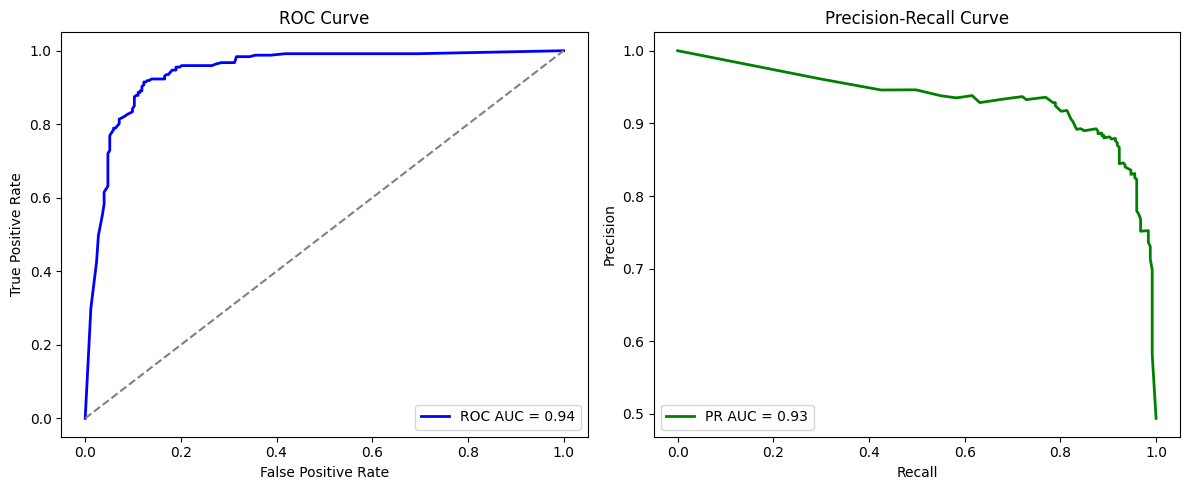

In [30]:

    ######################
    ### Your code here ### 
    ######################
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
proba = rf.predict_proba(X_test)[:, 1]
plot_roc_pr(proba, y_test)

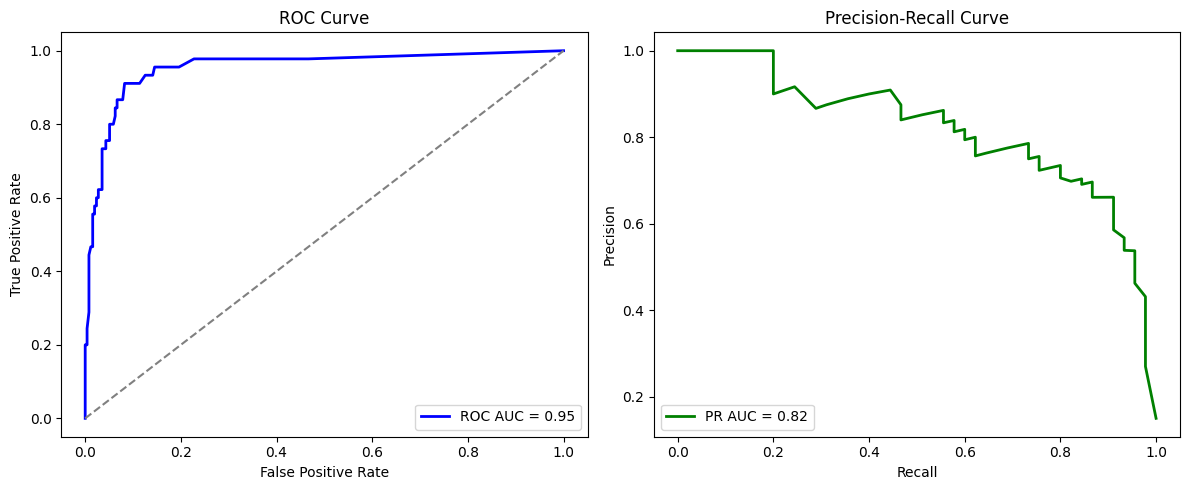

In [31]:
X_train, X_test, y_train, y_test = train_test_split(*subsample_data(X, y, keep_ratio=0.2), random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
proba = rf.predict_proba(X_test)[:, 1]
plot_roc_pr(proba, y_test)

We can notice that by using the subsample_data function on the dataset: the ROC curve presents a slightly improvement and the precision-reacall curve gets way worse.

**Answer 11**:
\begin{align*}
\mathrm{Precision} &= \mathbb{P}(Y = 1, \hat{Y} = 1 \mid \hat{Y} = 1) \\
\mathrm{Recall} &= \mathbb{P}(Y = 1, \hat{Y} = 1 \mid Y = 1) \\
\mathrm{FPR} &= \mathbb{P}(Y = 0, \hat{Y} = 1 \mid Y = 0) \\
\mathrm{TPR} &= \mathbb{P}(Y = 1, \hat{Y} = 1 \mid Y = 1)
\end{align*}

**Answer 12**: The F1-score is the harmonic mean of the recall and precision.
\begin{align*}
\mathrm{F}_1 = \frac{2}{\frac{1}{\mathrm{Recall}} + \frac{1}{\mathrm{Precision}}}
\end{align*}